# Exploratory Data Analysis

## Task

- Load in your csv.gz's of results for each year extracted.
- Concatenate the data into 1 dataframe for the remainder of the analysis.
- Once you have your data from the API, they would like you to perform some light EDA to show:
  - How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
  - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
  - How many movies are there in each of the certification categories (G/PG/PG-13/R)?
  - What is the average revenue per certification category?
  - What is the average budget per certification category?

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Upload Data

In [3]:
#import 2000 movie file
movies_2000 = pd.read_csv("Data/final_movies_2000.csv.gz", low_memory = False)
movies_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.114,2188.0,NaN


In [4]:
#import 2001 movie file
movies_2001 = pd.read_csv("Data/final_movies_2001.csv.gz", low_memory = False)
movies_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.325,1185.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.536,124.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.100,29.0,R


### Concatenate dataframes

In [5]:
## concatenate the previous results and new results. 
movies = pd.concat([movies_2001, movies_2000],
                      ignore_index=True)

#display first 3 rows
movies.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.325,1185.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN


### EDA

In [7]:
#verifying how many rows/columns, datatypes, missing items and duplicate rows
print(movies.info())
print(('-'*30))
print(f'There are {movies.duplicated().sum()} duplicate rows.')
print(('-'*30))
print(f'There are {movies.isna().sum().sum()} missing values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2545 non-null   object 
 1   adult                  2543 non-null   float64
 2   backdrop_path          1388 non-null   object 
 3   belongs_to_collection  206 non-null    object 
 4   budget                 2543 non-null   float64
 5   genres                 2543 non-null   object 
 6   homepage               171 non-null    object 
 7   id                     2543 non-null   float64
 8   original_language      2543 non-null   object 
 9   original_title         2543 non-null   object 
 10  overview               2494 non-null   object 
 11  popularity             2543 non-null   float64
 12  poster_path            2297 non-null   object 
 13  production_companies   2543 non-null   object 
 14  production_countries   2543 non-null   object 
 15  rele

In [13]:
#filtering out movies with values in either budget or revenue
movies_with_values = movies[ (movies['budget'] > 0) | (movies['revenue'] > 0) ]
movies_with_values.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.325,1185.0,PG-13
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.536,124.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.100,29.0,R
5,tt0119004,0.0,/7xrlSPGDO4CDT6IHTctDlkYxTzw.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,37857.0,en,Don's Plum,...,6297.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Don's Plum,0.0,5.400,66.0,NaN
8,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.686,2493.0,R


In [22]:
print('There are 636 movies with a value in either budget or revenue.\n')
movies_with_values.info()

There are 636 movies with a value in either budget or revenue.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 1 to 2543
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                636 non-null    object 
 1   adult                  636 non-null    float64
 2   backdrop_path          540 non-null    object 
 3   belongs_to_collection  110 non-null    object 
 4   budget                 636 non-null    float64
 5   genres                 636 non-null    object 
 6   homepage               76 non-null     object 
 7   id                     636 non-null    float64
 8   original_language      636 non-null    object 
 9   original_title         636 non-null    object 
 10  overview               634 non-null    object 
 11  popularity             636 non-null    float64
 12  poster_path            618 non-null    object 
 13  production_companies   636 non-null    object

In [24]:
#filtering out movies with 0 budget AND revenue
zero = movies[ (movies['budget'] == 0) & (movies['revenue'] == 0) ].index

#dropping rows with zero in budget AND revenue
movies.drop(zero, inplace=True)

In [25]:
#setting matplotlib style
plt.style.use('dark_background')

In [28]:
#count for each certification category
movies['certification'].value_counts()

R        130
PG-13     77
PG        20
G         10
NR         5
Name: certification, dtype: int64

In [30]:
movies_by_cert = movies.groupby('certification').count()
movies_by_cert

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
certification,,,,,,,,,,,,,,,,,,,,,
G,10,10,10,6,10,10,1,10,10,10,...,10,10,10,10,10,9,10,10,10,10
NR,5,5,3,0,5,5,0,5,5,5,...,5,5,5,5,5,3,5,5,5,5
PG,20,20,18,5,20,20,4,20,20,20,...,20,20,20,20,20,17,20,20,20,20
PG-13,77,77,75,19,77,77,11,77,77,77,...,77,77,77,77,77,75,77,77,77,77
R,130,130,114,14,130,130,12,130,130,130,...,130,130,130,130,130,115,130,130,130,130


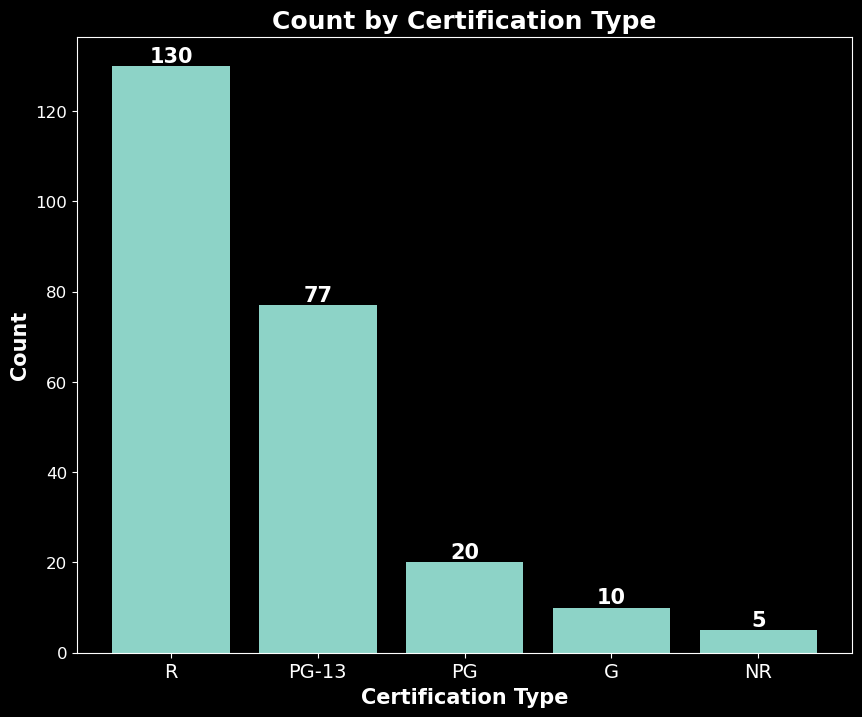

In [55]:
#filter for average revenue by certification
movies_count = movies['certification'].value_counts()

#plotting bar graph
fig, ax = plt.subplots(figsize=(10,8))
container = ax.bar(movies_count.index, movies_count.values)
ax.bar_label(container,size=15, color='white', fontweight='bold')
plt.title('Count by Certification Type', fontsize=18, fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')
plt.xlabel('Certification Type',fontsize=15,fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=12);

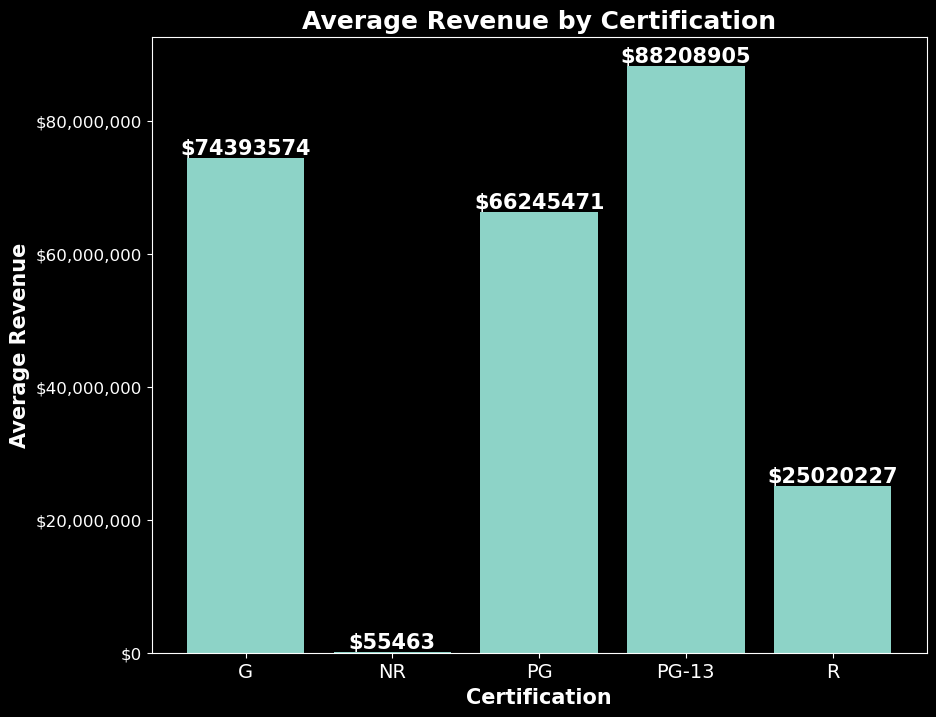

In [51]:
#filter for average revenue by certification
cat_revenue = movies.groupby('certification')['revenue'].mean()

#plotting bar graph
fig, ax = plt.subplots(figsize=(10,8))
container = ax.bar(cat_revenue.index, cat_revenue.values)
ax.bar_label(container,fmt = '$%d',size=15, color='white', fontweight='bold')
plt.title('Average Revenue by Certification', fontsize=18, fontweight='bold')
plt.ylabel('Average Revenue',fontsize=15,fontweight='bold')
plt.xlabel('Certification',fontsize=15,fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');

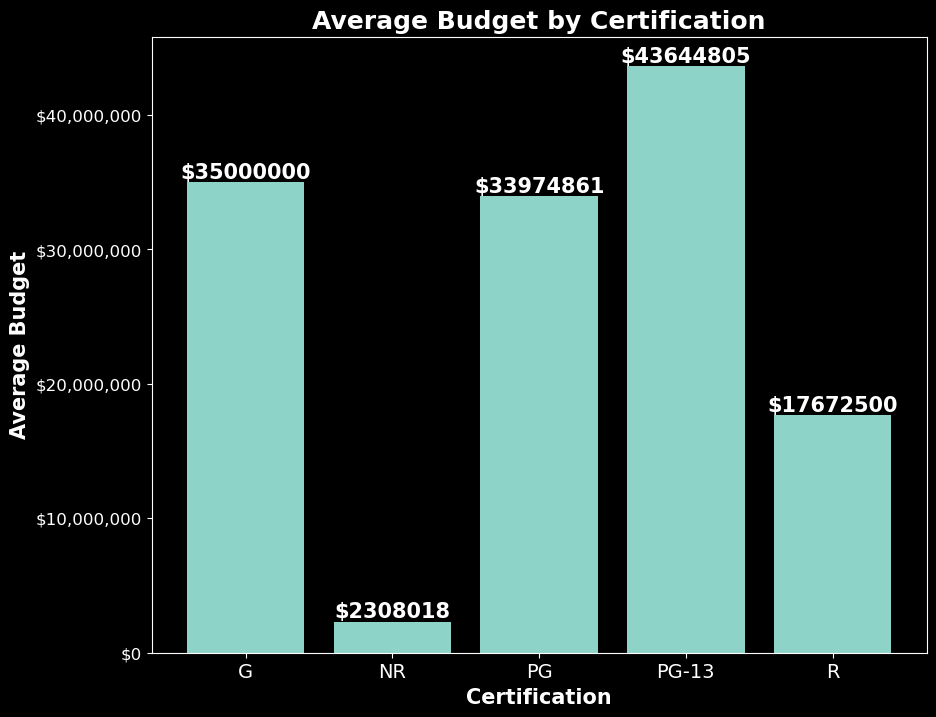

In [56]:
#filter for average revenue by certification
cat_budget = movies.groupby('certification')['budget'].mean()

#plotting bar graph
fig, ax = plt.subplots(figsize=(10,8))
container = ax.bar(cat_budget.index, cat_budget.values)
ax.bar_label(container,fmt = '$%d',size=15, color='white', fontweight='bold')
plt.title('Average Budget by Certification', fontsize=18, fontweight='bold')
plt.ylabel('Average Budget',fontsize=15,fontweight='bold')
plt.xlabel('Certification',fontsize=15,fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');